<a href="https://colab.research.google.com/github/JasonKeha/Structured_Query_Language-SQL-/blob/main/The_SQL_Murder_Mystery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"There's been a Murder in SQL City!" The SQL Murder Mystery is designed to be both a self-directed lesson to learn SQL concepts and commands and a fun game for experienced SQL users to solve an intriguing crime.

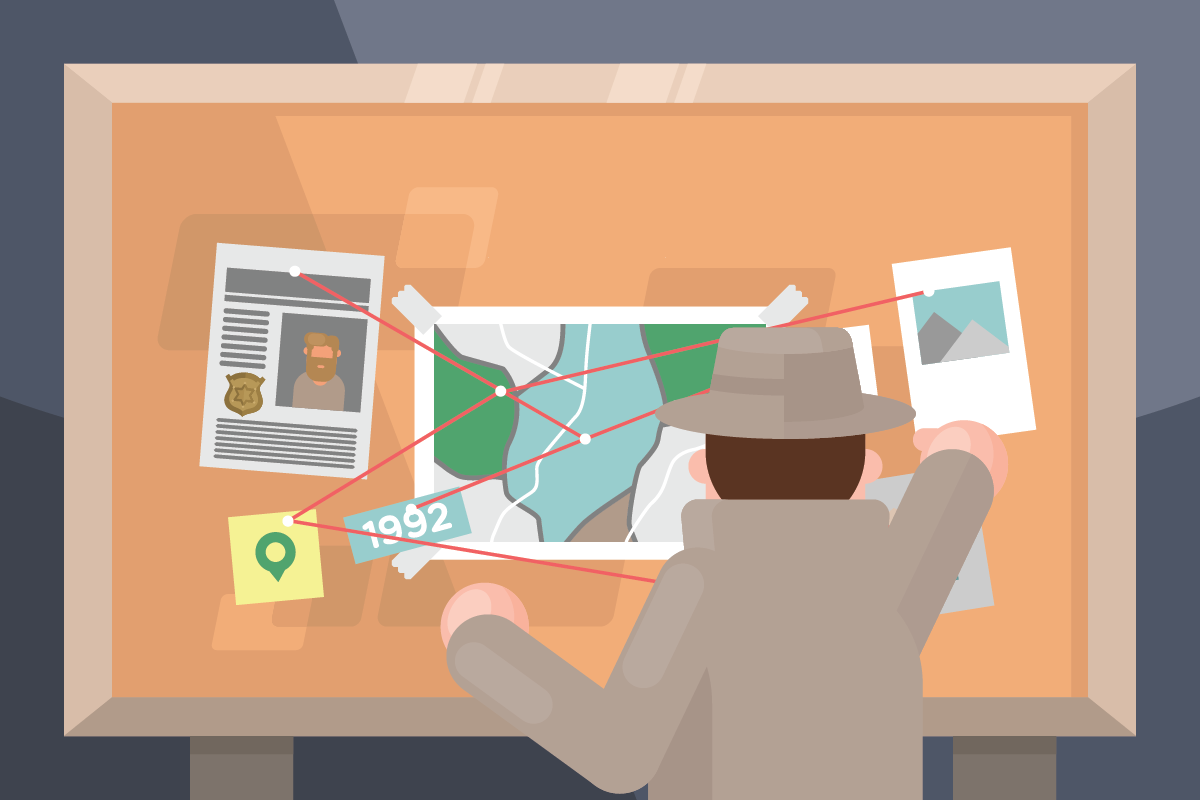

Link to the original website hosting the SQL Murder Mystery: https://mystery.knightlab.com

### Importing the necessary libraries to work SQL queries using python


In [ ]:
import sqlite3 as sql
import pandas as pd

### Connecting to our dataset

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

API Details

Username : itsjasonk

Key : 0fdaa64cb05419c3c1403b05d9aec00d

In [ ]:
od.download('https://www.kaggle.com/datasets/johnp47/sql-murder-mystery-database/code')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: itsjasonk
Your Kaggle Key: ··········


100%|██████████| 1.62M/1.62M [00:00<00:00, 80.0MB/s]

### Defining our SQL connection

In [ ]:
conn = sql.connect('/content/sql-murder-mystery-database/sql-murder-mystery.db')

### Setting the dataframe width to max for better viewing.

In [ ]:
pd.set_option("display.max_colwidth", None)

### Our database tables:

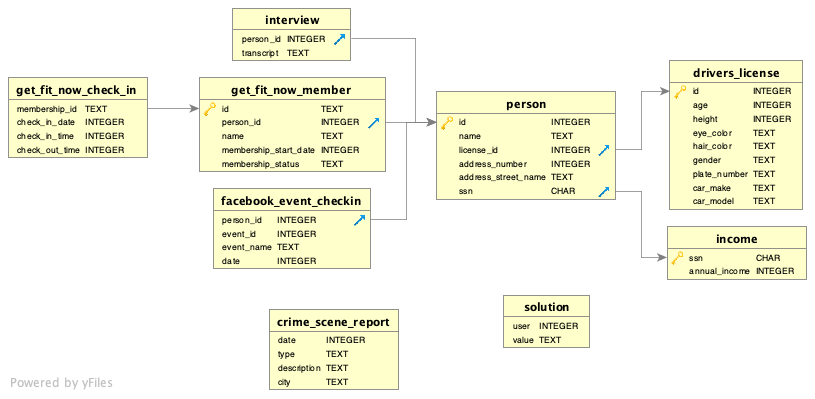

### Confirming the number and the names of our tables

In [ ]:
query_check = '''
SELECT name 
FROM sqlite_master 
WHERE type = "table"
LIMIT 10; 
'''
pd.read_sql_query(query_check, conn)
# Our tables seem okay

,name
0,crime_scene_report
1,drivers_license
2,person
3,facebook_event_checkin
4,interview
5,get_fit_now_member
6,get_fit_now_check_in
7,income
8,solution


### Details of the crime that we have:

"A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a ​murder​ that occurred sometime on **​Jan.15, 2018​** and that it took place in **​SQL City​**. Start by retrieving the corresponding crime scene report from the police department’s database."

In [ ]:
query_1 = '''
SELECT * 
FROM crime_scene_report 
WHERE city = "SQL City" 
AND date = "20180115"
AND type = "murder"
LIMIT 10;
'''
# Confirming our crime details
pd.read_sql_query(query_1, conn)

,date,type,description,city
0,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


### Finding our witnesses

In [ ]:
query_2 = '''
SELECT * 
FROM person
WHERE address_street_name = "Northwestern Dr"
ORDER BY address_number DESC
LIMIT 1;
'''
# Finding the second witness
pd.read_sql_query(query_2, conn)

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [ ]:
query_3 = '''
SELECT * 
FROM person
WHERE address_street_name = "Franklin Ave"
AND name LIKE "Annabel%"
LIMIT 10;
'''
# Finding the second witness
pd.read_sql_query(query_3, conn)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


### Checking our witnesses transcripts

In [ ]:
query_4 = '''
SELECT p.name, i.transcript 
FROM person p
JOIN interview i
ON p.id = i.person_id
WHERE p.id = 16371 
OR p.id = 14887
LIMIT 10;
'''
# Finding the witnesses transcripts
pd.read_sql_query(query_4, conn)

,name,transcript
0,Morty Schapiro,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."
1,Annabel Miller,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


### Finding the murderer based on the witnesses transcripts

In [ ]:
query_5 = '''
SELECT DISTINCT p.name, p.id, fit.membership_id, mem.membership_status, dl.plate_number 
FROM get_fit_now_check_in fit
JOIN get_fit_now_member mem
ON fit.membership_id = mem.id
JOIN person p
ON p.id = mem.person_id
JOIN drivers_license dl
ON p.license_id = dl.id
WHERE fit.membership_id LIKE "48Z%"
AND fit.check_in_date = "20180109"
AND mem.membership_status = "gold"
AND dl.plate_number LIKE "%H42W%"
AND dl.gender = "male"
LIMIT 10;
'''
# Finding the murderer
pd.read_sql_query(query_5, conn)

,name,id,membership_id,membership_status,plate_number
0,Jeremy Bowers,67318,48Z55,gold,0H42W2


### Our murderer is clearly Jeremy Bowers! Let's check if we are correct


This is the result when you input the name "Jeremy Bowers":
```
Congrats, you found the murderer! But wait, there's more... 
If you think you're up for a challenge, try querying the interview transcript of the murderer to find the real villain behind this crime.
If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries.
Use this same INSERT statement with your new suspect to check your answer.
```
We found the murderer correctly


### Checking the murderer's transcripts

In [ ]:
query_6 = '''
SELECT DISTINCT p.name, i.transcript
FROM person p
JOIN interview i
ON p.id = i.person_id
WHERE p.id = 67318
LIMIT 10;
'''
# Finding the murderer's transcript
pd.read_sql_query(query_6, conn)

,name,transcript
0,Jeremy Bowers,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


### Finding the real culprit

In [ ]:
query_7 = '''
SELECT DISTINCT p.name, dl.gender, dl.height, dl.hair_color, dl.car_make,
dl.car_model, fb.event_name, fb.date, COUNT(fb.date) as attendance_count 
FROM person p
JOIN drivers_license dl
ON p.license_id = dl.id
JOIN facebook_event_checkin fb
ON fb.person_id = p.id
WHERE dl.gender = "female"
AND dl.height BETWEEN 65 AND 67
AND dl.hair_color = "red"
AND dl.car_make = "Tesla"
AND dl.car_model = "Model S"
AND fb.event_name = "SQL Symphony Concert"
AND fb.date >= 20171200 AND fb.date <= 20171231
GROUP BY p.name
HAVING attendance_count = 3
LIMIT 10;
'''
# Finding the murderer's transcript
pd.read_sql_query(query_7, conn)

,name,gender,height,hair_color,car_make,car_model,event_name,date,attendance_count
0,Miranda Priestly,female,66,red,Tesla,Model S,SQL Symphony Concert,20171206,3


###  We can clearly see that the real culprit is Miranda Priestly

This is the result when you input the name "Miranda Priestly":
```
Congrats, you found the brains behind the murder! 
Everyone in SQL City hails you as the greatest SQL detective of all time. 
Time to break out the champagne!
```
We found the real culprit correctly in 7 queries!!